# Computer Science 580: Graduate Project

## Introduction

This Jupyter Notebook delves into the comparison of quantum embedding methods alongside classical Support Vector Machine (SVM) classification on the Heart Disease dataset. Each quantum embedding method and SVM technique will be thoroughly explored to understand their functionality and effectiveness in classification tasks.

## Dataset

Heart Disease Dataset Summary (using only 400 here for bevity)

Heart disease is a leading cause of death in the United States, affecting millions annually and significantly impacting the economy. It's primarily caused by plaque buildup in coronary arteries, molecular aging, chronic inflammation, high blood pressure, and diabetes. Despite its prevalence, many individuals remain unaware of their condition until experiencing symptoms like chest pain or a heart attack. This reality underscores the critical need for preventative measures and accurate predictive tests for heart disease.

The CDC highlights three primary risk factors for heart disease: high blood pressure, high blood cholesterol, and smoking, with nearly half of Americans presenting at least one of these risks. The National Heart, Lung, and Blood Institute further identifies factors such as age, environment, family history, lifestyle habits, other medical conditions, race, and sex as crucial in diagnosing coronary heart disease.


The dataset is derived from the Behavioral Risk Factor Surveillance System (BRFSS) 2015, an annual health-related telephone survey conducted by the CDC. This survey gathers data from over 400,000 Americans on health behaviors, chronic health conditions, and preventative service use. The dataset for this project, sourced from Kaggle, comprises 253,680 responses from the 2015 survey, narrowed down for the binary classification of heart disease. it has strong class imbalance: 229,787 respondents reported no heart disease, while 23,893 confirmed having it. 


## Methodology

### Data Preprocessing
#### Data Selection: From the dataset, a subset of 400 records is chosen for analysis. This subset focuses on unique features deemed most relevant for predicting heart disease.

##### Feature Selection: The features include:

- GenHlth: General health perception
- Age: Age of the individual
- DiffWalk: Difficulty walking
- HighBP: High blood pressure
- CholCheck: Cholesterol checkup frequency
- AnyHealthcare: Access to healthcare
- Veggies: Vegetable consumption
- HeartDiseaseorAttack: Target variable indicating the occurrence of heart disease or an attack
- Standardization: Features are standardized to have a mean of 0 and a standard deviation of 1, ensuring that all inputs are treated equally in the model.

### Quantum Embedding Methods

#### Angle Embedding

Angle Embedding utilizes PennyLane's AngleEmbedding method, which encodes data into quantum states by representing features with angles. This method is particularly effective for encoding continuous-valued features.

#### Amplitude Embedding

Amplitude Embedding, another quantum encoding approach provided by PennyLane, represents data by modulating the amplitude of qubits. It is useful for handling amplitude-based data representation tasks.

#### Basis Embedding

Basis Embedding transforms features into binary format and employs PennyLane's BasisEmbedding method. This technique is beneficial for encoding categorical or discrete features into quantum states.

#### IQP Embedding

IQP (Instantaneous Quantum Polynomial) Embedding leverages PennyLane's IQPEmbedding method to encode data into quantum states. IQP circuits are known for their simplicity and efficiency in representing data.

### Kernel Matrix Calculation

Kernel matrices are computed using the specified quantum embedding methods. These matrices encapsulate the pairwise similarity between data points, crucial for SVM classification.

### Support Vector Machine Classification

Support Vector Machine classifiers are trained using the computed kernel matrices. SVM is a powerful machine learning algorithm for classification tasks, known for its ability to find optimal hyperplanes that separate different classes.

### Evaluation

The performance of each quantum embedding method and SVM technique is evaluated based on classification accuracy and execution time. These metrics provide insights into the effectiveness and efficiency of the approaches.

## Libraries Used

- **NumPy**: For numerical computations.
- **Pandas**: For data manipulation and analysis.
- **Matplotlib and Seaborn**: For data visualization.
- **Scikit-learn**: For implementing SVM classifiers and evaluation metrics.
- **Pennylane**: For quantum machine learning functionalities.
- **Tabulate**: For presenting results in a tabular format.


In [10]:
import numpy as np; import pandas as pd
import matplotlib.pyplot as plt;import seaborn as sns
import torch
from torch.nn.functional import relu

from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_classif

import pennylane as qml
from pennylane.templates import AngleEmbedding, StronglyEntanglingLayers
from pennylane.operation import Tensor
import warnings;warnings.filterwarnings("ignore")
np.random.seed(17)
import time
from tabulate import tabulate
N=400

df = pd.read_csv("heart.csv")

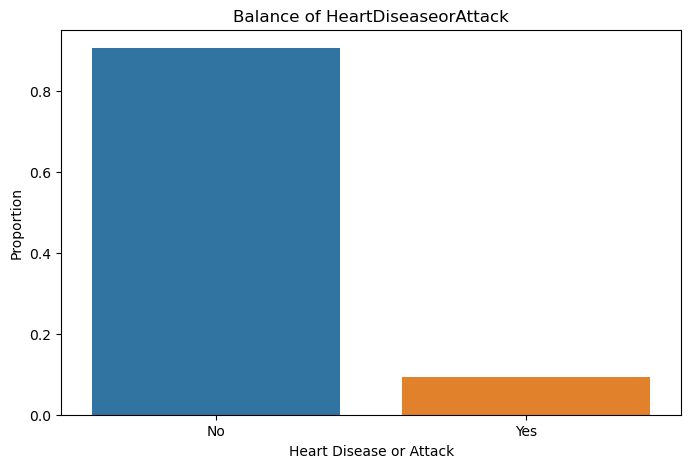

0.0    0.905814
1.0    0.094186
Name: HeartDiseaseorAttack, dtype: float64

In [11]:
# Check the balance of target 
heart_data = df
target_balance = heart_data['HeartDiseaseorAttack'].value_counts(normalize=True)

plt.figure(figsize=(8, 5))
sns.barplot(x=target_balance.index, y=target_balance.values)
plt.title('Balance of HeartDiseaseorAttack')
plt.xlabel('Heart Disease or Attack')
plt.ylabel('Proportion')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

target_balance

In [12]:
correlation_matrix = df.corr()
target_correlation = correlation_matrix['HeartDiseaseorAttack'].sort_values(ascending=False)
target_correlation

HeartDiseaseorAttack    1.000000
GenHlth                 0.258383
Age                     0.221618
DiffWalk                0.212709
HighBP                  0.209361
Stroke                  0.203002
PhysHlth                0.181698
HighChol                0.180765
Diabetes                0.180272
Smoker                  0.114441
Sex                     0.086096
MentHlth                0.064621
BMI                     0.052904
CholCheck               0.044206
NoDocbcCost             0.031000
AnyHealthcare           0.018734
Fruits                 -0.019790
HvyAlcoholConsump      -0.028991
Veggies                -0.039167
PhysActivity           -0.087299
Education              -0.099600
Income                 -0.141011
Name: HeartDiseaseorAttack, dtype: float64

The correlation analysis shows that the top 6 parameters most positively correlated with HeartDiseaseorAttack are:

- GenHlth (General Health) with a correlation coefficient of 0.258
- Age with a correlation coefficient of 0.222
- DiffWalk (Difficulty Walking) with a correlation coefficient of 0.213
- HighBP (High Blood Pressure) with a correlation coefficient of 0.209
- Stroke with a correlation coefficient of 0.203
- PhysHlth (Physical Health) with a correlation coefficient of 0.182

In [13]:
X = df.drop('HeartDiseaseorAttack', axis=1)
y = df['HeartDiseaseorAttack']
mutual_info_scores = mutual_info_classif(X, y)
mi_scores_series = pd.Series(mutual_info_scores, index=X.columns).sort_values(ascending=False)
mi_scores_series

AnyHealthcare        0.055825
CholCheck            0.051443
PhysActivity         0.050245
Veggies              0.045286
HighBP               0.044762
Fruits               0.043232
GenHlth              0.042465
HighChol             0.037723
Age                  0.032130
Smoker               0.031285
Sex                  0.029503
Education            0.021764
DiffWalk             0.020638
Income               0.019134
Diabetes             0.016540
PhysHlth             0.014256
Stroke               0.013320
BMI                  0.005568
MentHlth             0.003442
HvyAlcoholConsump    0.002014
NoDocbcCost          0.001100
dtype: float64

The mutual information scores, which capture both linear and non-linear relationships between each feature and the target variable, HeartDiseaseorAttack, suggest a slightly different set of top predictive parameters compared to the linear correlation analysis. Here are the top 6 features based on mutual information scores:

- CholCheck (Cholesterol Check) with a score of 0.050
- AnyHealthcare with a score of 0.047
- GenHlth (General Health) with a score of 0.044
- Veggies with a score of 0.036
- PhysActivity (Physical Activity) with a score of 0.034
- Age with a score of 0.033

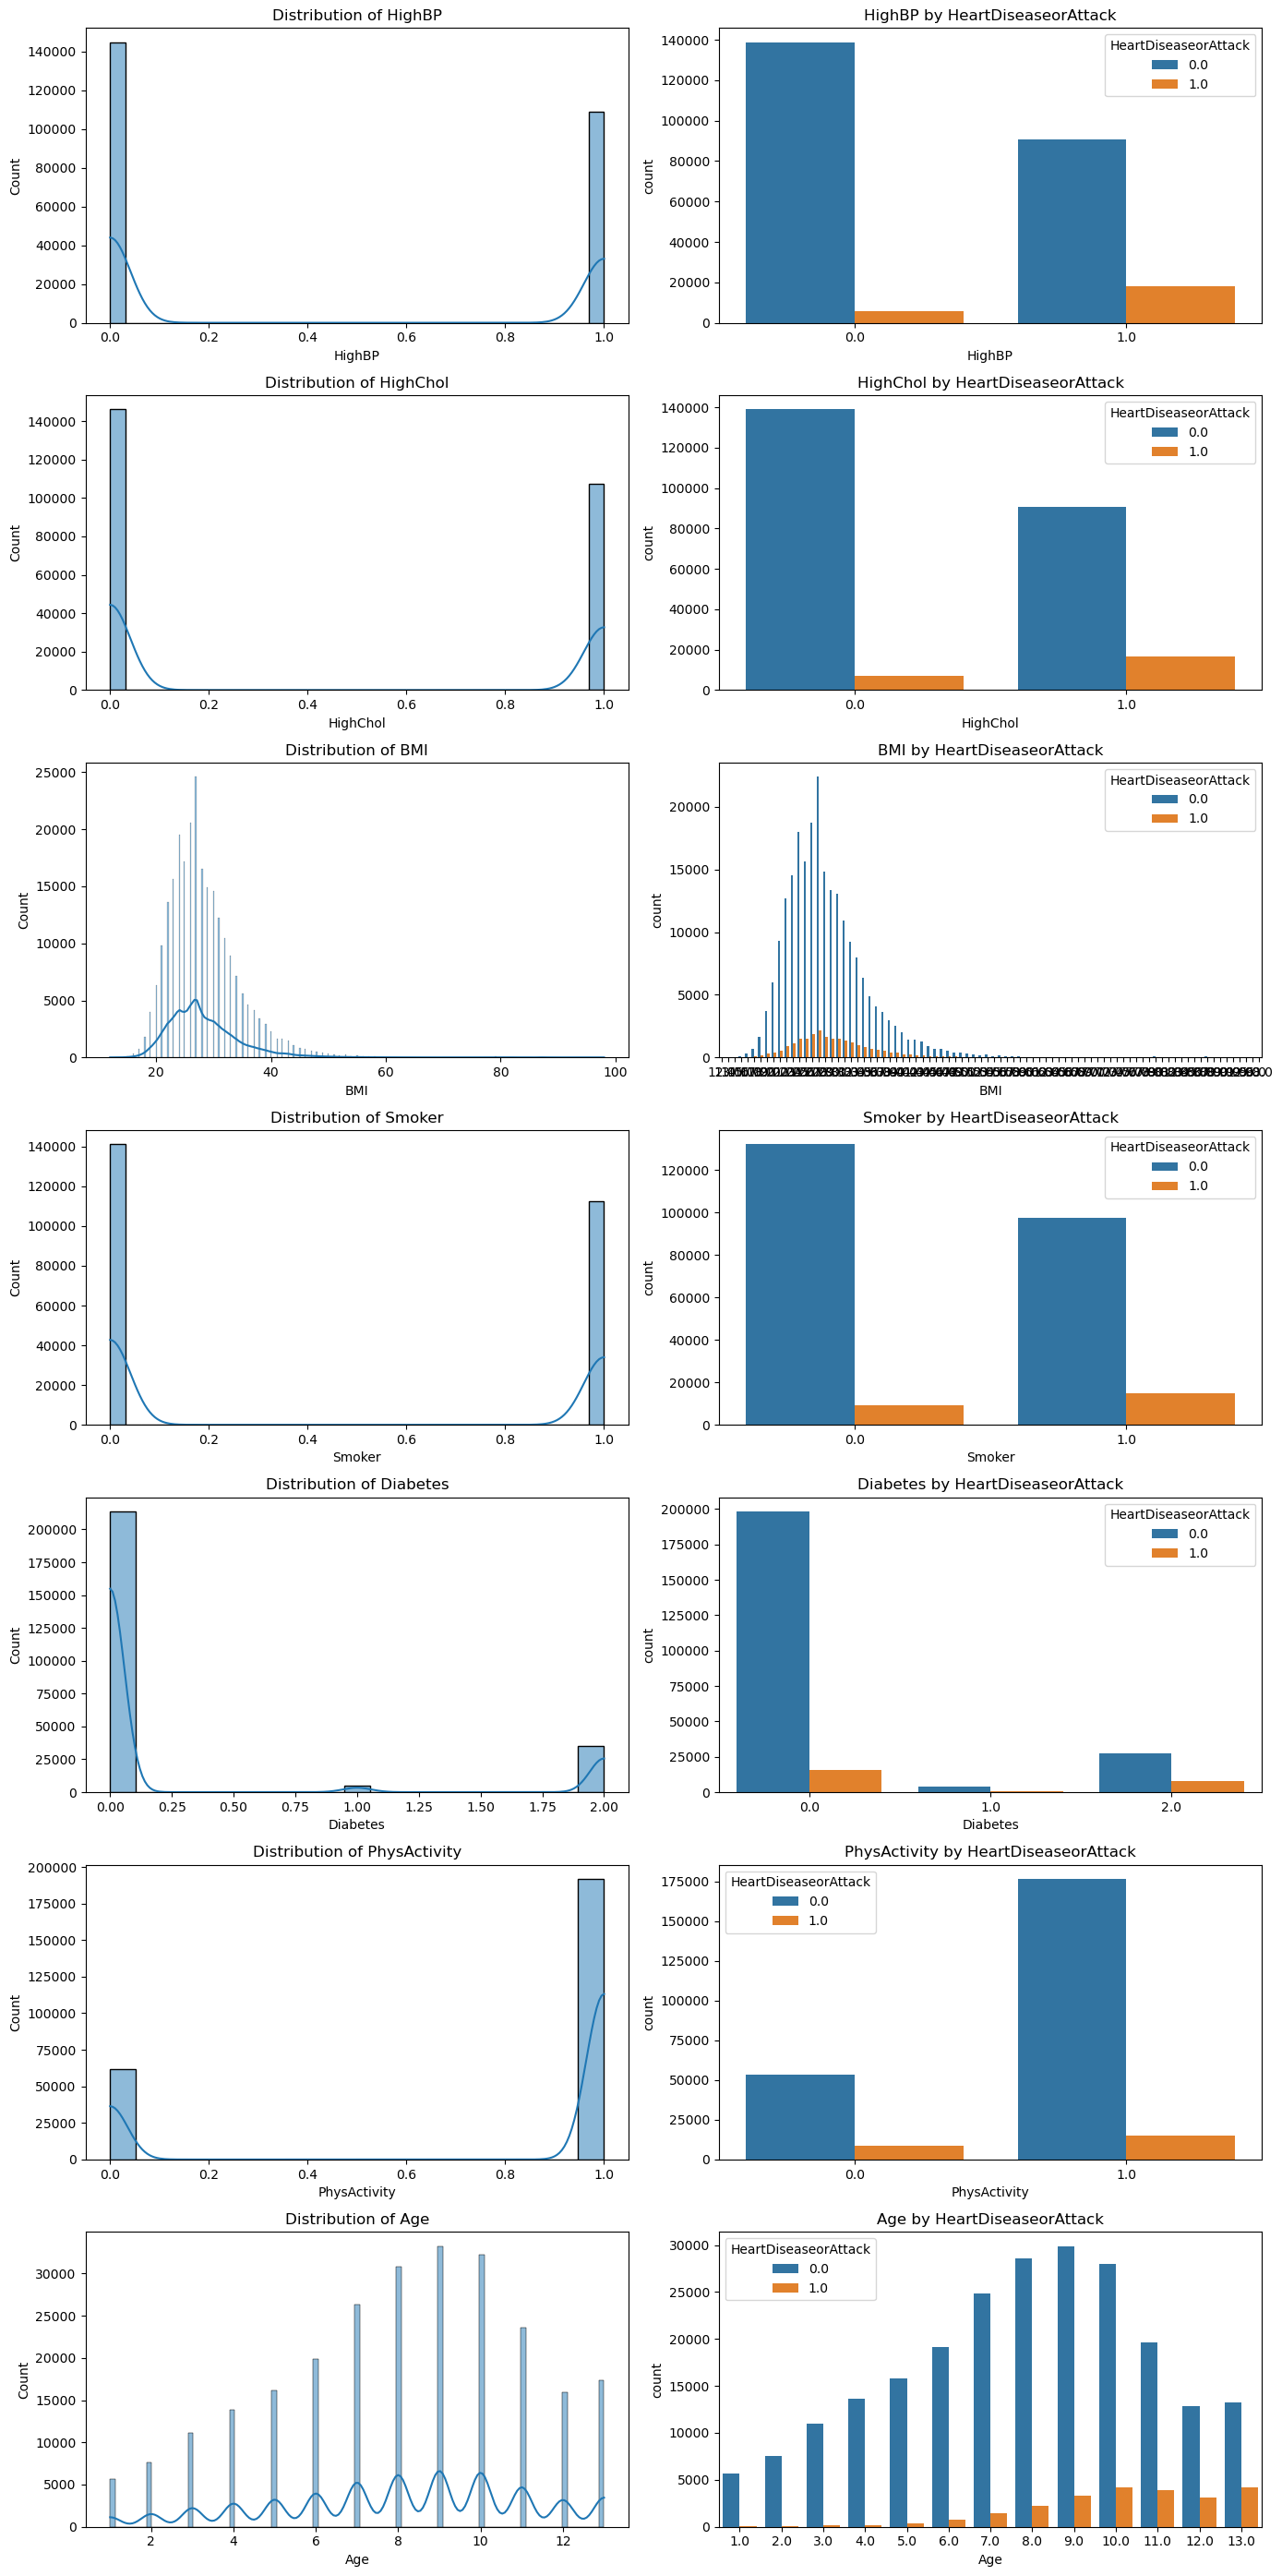

In [14]:
# subset of params chosen based on potential relevance to risk
key_parameters = ['HighBP', 'HighChol', 'BMI', 'Smoker', 'Diabetes', 'PhysActivity', 'Age']
fig, axes = plt.subplots(nrows=len(key_parameters), ncols=2, figsize=(14, 4 * len(key_parameters)))

for i, param in enumerate(key_parameters):
    sns.histplot(heart_data[param], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution of {param}')
    sns.countplot(x=param, hue='HeartDiseaseorAttack', data=heart_data, ax=axes[i, 1])
    axes[i, 1].set_title(f'{param} by HeartDiseaseorAttack')

plt.tight_layout()
plt.show()

In [15]:
# subet with best params and N set in first block..
unique_features = ['GenHlth', 'Age', 'DiffWalk', 'HighBP', 'CholCheck', 'AnyHealthcare', 'Veggies']
features_with_target = unique_features + ['HeartDiseaseorAttack']
refined_dataset = df[features_with_target]
heart = refined_dataset.iloc[0:N,]
heart.shape

(400, 8)

In [16]:
y = heart['HeartDiseaseorAttack']
heart.drop('HeartDiseaseorAttack',axis=1,inplace=True)
y_scaled = 2 * (y - 0.5)
X = heart.to_numpy()
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled)

In [17]:
# quantum kernal params
n_qubits = len(X_train[0])
dev_kernel = qml.device("lightning.qubit", wires=n_qubits)

projector = np.zeros((2**n_qubits, 2**n_qubits))
projector[0, 0] = 1

### In-Depth Introduction to the Angle Embedding Method

#### Overview
The Angle Embedding method is a QML technique used to encode classical data into quantum states, facilitating the processing of information using quantum computing. This method is particularly useful in quantum kernel methods, where the aim is to exploit the  advantages of quantum computing to improve ML models such as SVM.

#### Implementation Details
The implementation of the Angle Embedding method involves several key steps, using PennyLane, a library for quantum machine learning that integrates with existing ML libraries:

1. **Quantum Node (`qml.qnode`)**: A quantum node is created on a specified quantum device, `dev_kernel`, which acts as the computational backend. In this case, `dev_kernel` is a quantum simulator capable of simulating quantum circuits.

2. **Embedding Classical Data**: The `AngleEmbedding` feature map is used to encode classical data into the quantum state. Each feature of the classical data vector is mapped to an angle of a rotation gate, which is applied to the corresponding qubit. This process effectively translates the classical data into a quantum state that reflects the information contained in the data.

   - **Direct and Adjoint Embedding**: For each pair of data points `x1` and `x2`, `AngleEmbedding` is applied directly to `x1` and in its adjoint (inverse) form to `x2`. This technique ensures that the quantum state reflects the relative information of both data points.

3. **Quantum Kernel Calculation**: The heart of this method is the computation of a kernel matrix, which measures the similarity between data points in the quantum feature space. The kernel between two data points `a` and `b` is calculated by measuring the expectation value of a Hermitian operator (in this case, a projector onto the zero state) on the quantum state resulting from the embedding of `a` and `b`.

4. **Integration with SVM**: The computed quantum kernel matrix serves as the kernel for an SVM model, replacing the classical kernel function. This integration allows the SVM to operate in the high-dimensional feature space implicitly defined by the quantum feature map, potentially capturing patterns in the data.

5. **Performance Evaluation**: The execution time for training the SVM with the quantum kernel is measured, providing insights into the computational efficiency of using quantum kernels.

#### Advantages
The Angle Embedding method offers a novel approach for creating complex, high-dimensional feature spaces without explicitly computing them could lead to better performance on tasks such as classification.


In [20]:
# Angel Embedding Method
start_time = time.time()

@qml.qnode(dev_kernel)
def kernel(x1, x2):
    AngleEmbedding(x1, wires=range(n_qubits))
    qml.adjoint(AngleEmbedding)(x2, wires=range(n_qubits))
    return qml.expval(qml.Hermitian(projector, wires=range(n_qubits)))

def kernel_matrix(A, B):
    return np.array([[kernel(a, b) for b in B] for a in A])


svm1 = SVC(kernel=kernel_matrix).fit(X_train, y_train)
end_time = time.time()
execution_time = end_time - start_time
execution_time_minutes1 = execution_time / 60  


### In-Depth Introduction to the Amplitude Embedding Method

#### Overview
The Amplitude Embedding method represents another approach within QML to integrate classical data into quantum systems. Unlike the Angle Embedding method, which encodes data into the angles of quantum gates, Amplitude Embedding directly manipulates the amplitudes of a quantum state to represent data, allowing for a more compact representation of classical info in the quantum domain.

#### Implementation Details
The procedure for implementing this method involves again utilizing PennyLane for the integration of quantum computing capabilities with traditional ML frameworks:

1. **Quantum Node (`qml.qnode`)**: A quantum node is established on a designated quantum device, `dev_kernel`, which serves as the computational framework for executing quantum operations. The device can be a simulator or an actual quantum computer.

2. **Data Embedding**: In this method, classical data vectors are encoded into the amplitudes of a quantum state. Each element of the data vector corresponds to the amplitude of a quantum state's basis state, thereby mapping the entire dataset into a high-dimensional quantum space.
   
   - **Normalization**: The data vectors are normalized to ensure that their representation as quantum state amplitudes adheres to the probabilistic nature of quantum mechanics. Additionally, if necessary, padding with zeros (`pad_with=0.`) is applied to match the dimensionality required by the number of qubits in the system.
   
   - **Adjoint Operation**: For each pair of data points `x1` and `x2`, `AmplitudeEmbedding` is applied to `x1` and then in its adjoint (inverse) form to `x2`. This process effectively creates a quantum state that encompasses the information of both input vectors in a superposition, facilitating the measurement of their similarity.

3. **Quantum Kernel Calculation**: The core of the Amplitude Embedding method is computing a kernel matrix that quantifies the similarity between pairs of data points in the quantum feature space. This is achieved by measuring the expectation value of a predefined Hermitian operator, in this instance, utilizing a projector onto a specific quantum state, across the quantum states generated by embedding the data points.

4. **SVM Integration**: The quantum kernel matrix is used as an innovative kernel for the SVM, enabling the classifier to operate within a quantum-induced feature space. This integration holds the promise of uncovering complex patterns in the data by leveraging the high-dimensional capabilities of quantum systems.

5. **Performance and Efficiency**: The method's efficiency is evaluated by measuring the time required to train the SVM with the quantum kernel, offering insights into the practicality and computational demands of quantum-enhanced machine learning models.

#### Advantages
Amplitude Embedding offers a unique advantage by efficiently representing large datasets within the exponentially scalable space of a quantum system, potentially enabling more nuanced classification boundaries than classical embeddings.


In [21]:
# Amplitude Embedding Method
start_time = time.time()
@qml.qnode(dev_kernel)
def kernel2(x1, x2):
    qml.AmplitudeEmbedding(x1, wires=range(n_qubits), pad_with=0., normalize=True)
    qml.adjoint(qml.AmplitudeEmbedding)(x2, wires=range(n_qubits), pad_with=0., normalize=True)
    return qml.expval(qml.Hermitian(projector, wires=range(n_qubits)))

def kernel_matrix2(A, B):
    return np.array([[kernel2(a, b) for b in B] for a in A])

svm2 = SVC(kernel=kernel_matrix2).fit(X_train, y_train)
end_time = time.time()
execution_time = end_time - start_time
execution_time_minutes2 = execution_time / 60  


### In-Depth Introduction to the Basis Embedding Method

#### Overview
The Basis Embedding method is another embedding that encodes classical data directly into the computational basis states of a quantum system. This method is suited for binary where each feature of the data can be represented as a qubit being in either the |0⟩ or |1⟩ state. Basis Embedding offers a approach to quantum data encoding.

#### Implementation Details
Implementing the Basis Embedding method within QML framework involves a series of the following steps again executed with the aid of PennyLane:

1. **Quantum Node (`qml.qnode`)**: A quantum node is instantiated on a selected quantum device, `dev_kernel`, which facilitates the execution of quantum circuits. This device may be a quantum computer or a simulator designed to mimic quantum computational processes.

2. **Binary Conversion**: Given that Basis Embedding requires binary input data, a preprocessing step is employed to convert the continuous or categorical features of the dataset into binary format. This is achieved through a custom `to_binary` function, which maps positive values to 1 and non-positive values to 0, effectively binarizing the data.

3. **Data Embedding**: In the Basis Embedding process, the binary data is directly encoded into the quantum system's basis states. Each feature of a binarized data vector determines the state (|0⟩ or |1⟩) of a corresponding qubit, thus mapping the vector into a unique quantum state.

   - **Adjoint Operation**: For each pair of binarized data vectors `x1` and `x2`, `BasisEmbedding` is applied to `x1` and its inverse operation to `x2`. This dual embedding technique generates a state that translaets data into two vectors, setting up for a similarity measurement.

4. **Quantum Kernel Calculation**: At the heart of this method is the computation of a kernel matrix, which captures the similarity between points. The kernel values are derived from the expectation value of a Hermitian projector.

5. **Integration with SVM**: The resulting matrix serves as powerful kernel for an SVM classifier, allowing the model to discern patterns and relationships in the data that might be elusive in classical features.

6. **Efficiency and Performance Measurement**: The time taken to train the SVM with the quantum kernel is recorded, providing insight into the computational efficiency and viability of this approach in ml apps.

#### Advantages
Basis Embedding leverages the inherent binary nature of quantum info, offering a direct and but possible inefficient method for encoding binary data into quantum data. This approach is particularly advantageous for datasets where binary features play a critical role.


In [22]:
# Basis Embedding Method
start_time = time.time()
#  convert features to binary
def to_binary(features):
    return np.where(features >= 0, 1, 0)

@qml.qnode(dev_kernel)
def kernel3(x1, x2):
    qml.BasisEmbedding(to_binary(x1), wires=range(n_qubits))
    qml.adjoint(qml.BasisEmbedding)(to_binary(x2), wires=range(n_qubits))
    return qml.expval(qml.Hermitian(projector, wires=range(n_qubits)))

def kernel_matrix3(A, B):
    return np.array([[kernel3(a, b) for b in B] for a in A])


svm3 = SVC(kernel=kernel_matrix3).fit(X_train, y_train)
end_time = time.time()
execution_time = end_time - start_time
execution_time_minutes3 = execution_time / 60  


### In-Depth Introduction to the IQP Embedding Method

#### Overview
The IQP (Instantaneous Quantum Polynomial) Embedding method stands as a more sophisticated approach designed to encode viaa  sequences of quantum gates that represent polynomial transformations. This method is distinguished by its use of non-commuting gates, which are believed to provide a computational advantage by forcing highly entangled quantum states, enabling the processing of complex patterns challenging for classical methods.

#### Implementation Details
The implementation of the IQP Embedding method involves several  components, executed within the PennyLane agaim.

1. **Quantum Node (`qml.qnode`)**: 1st step is the instantiation of a quantum node on a quantum device, `dev_qubit`, which serves as the computational environment for performing quantum operations. 

2. **Embedding Classical Data**: The IQP Embedding process utilizes a sequence of gates that correspond to an Instantaneous Quantum Polynomial circuit.

   - **IQPEmbedding**: This function is designed to encode a data vector into a quantum state by applying a sequence of quantum gates that represent polynomial terms of the input features.

   - **Adjoint Operation**: For each pair of data vectors `x1` and `x2`, the `IQPEmbedding` is applied to `x1` and its adjoint form to `x2`. This approach ensures that the quantum state reflects the combined information of both vectors, facilitating a hopefully meaningful comparison.

3. **Quantum Kernel Calculation**: At the core of the IQP Embedding method is the generation of a kernel  that quantifies the similarity b/t points within the quantum-induced feature space. This similarity is measured by expectation value of a Pauli-Z observable on the first qubit.

4. **SVM Integration**: The computed quantum kernel matrix is then employed as the kernel for an SVM classifier. 

5. **Performance Evaluation**: The efficiency of the IQP Embedding method is gauged by measuring the duration required to train the SVM with the kernel.

#### Advantages
The IQP Embedding method offers a novel means of leveraging the complex entanglement and superposition capabilities of quantum computing to encode and process classical data. By harnessing non-linear and non-commutative quantum operations, it opens up new way for exploring data relationships


In [23]:
# IQP Embedding Method
start_time = time.time()
dev_qubit = qml.device("default.qubit", wires=n_qubits)
@qml.qnode(dev_qubit)
def kernel_iqp(x1, x2):
    qml.IQPEmbedding(x1, wires=range(n_qubits))
    qml.adjoint(qml.IQPEmbedding)(x2, wires=range(n_qubits))
    return qml.expval(qml.PauliZ(0))  # Using PauliZ observable

def kernel_matrix_iqp(A, B):
    return np.array([[kernel_iqp(a, b) for b in B] for a in A])

svm4 = SVC(kernel=kernel_matrix_iqp).fit(X_train, y_train)
end_time = time.time()
execution_time = end_time - start_time
execution_time_minutes4 = execution_time / 60  


In [24]:
predictions1 = svm1.predict(X_test)
a1= accuracy_score(predictions1, y_test)

predictions2 = svm2.predict(X_test)
a2= accuracy_score(predictions2, y_test)

predictions3 = svm3.predict(X_test)
a3= accuracy_score(predictions3, y_test)

predictions4 = svm4.predict(X_test)
a4=accuracy_score(predictions4, y_test)

In [29]:
# metric table 1
execution_times = [execution_time_minutes1, execution_time_minutes2, execution_time_minutes3, execution_time_minutes4]
accuracies = [a1, a2, a3, a4]
data = [[f"Execution Time {i+1}", f"{et:.2f} minutes", f"Accuracy {i+1}", f"{acc:.2f}%"] for i, (et, acc) in enumerate(zip(execution_times, accuracies))]
print(tabulate(data, headers=['Metric', 'Value', 'Metric', 'Value'], tablefmt='fancy_grid'))

╒══════════════════╤═══════════════╤════════════╤═════════╕
│ Metric           │ Value         │ Metric     │ Value   │
╞══════════════════╪═══════════════╪════════════╪═════════╡
│ Execution Time 1 │ 4.38 minutes  │ Accuracy 1 │ 0.90%   │
├──────────────────┼───────────────┼────────────┼─────────┤
│ Execution Time 2 │ 47.03 minutes │ Accuracy 2 │ 0.90%   │
├──────────────────┼───────────────┼────────────┼─────────┤
│ Execution Time 3 │ 3.95 minutes  │ Accuracy 3 │ 0.90%   │
├──────────────────┼───────────────┼────────────┼─────────┤
│ Execution Time 4 │ 11.24 minutes │ Accuracy 4 │ 0.90%   │
╘══════════════════╧═══════════════╧════════════╧═════════╛


# end for now.   need to figure out why all acc are equal?

## more to come..  possibly deep learning techinque